<a href="https://colab.research.google.com/github/Tieck-IT/Study/blob/main/template/%5Btemplate%5Dpretrained_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/Colab Notebooks"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks


In [3]:
!ls -al

total 143346
drwx------ 2 root root     4096 Dec 21 00:17  실습
drwx------ 2 root root     4096 Dec 22 00:45  딥러닝CNN_강의교재_실습자료
-rw------- 1 root root    75125 Dec 24 04:35  cnn_cifar10.ipynb
-rw------- 1 root root    30088 Dec 24 04:39  cnn_mnist_callbacks.ipynb
-rw------- 1 root root     4565 Dec 24 06:06  custom_data_generator.ipynb
-rw------- 1 root root     3031 Jun 23  2021  dacon_submit_api-0.0.4-py3-none-any.whl
-rw------- 1 root root 59050583 Dec 20 03:48  deep_learning_intro.pptx
drwx------ 2 root root     4096 Dec 21 04:04  DL
-rw------- 1 root root    95026 Dec 24 04:20 ' dnn_in_keras_callback.ipynb'
-rw------- 1 root root    71265 Dec 23 07:35  dnn_mnist.ipynb
-rw------- 1 root root     3926 Dec 24 06:50  flower_classification.ipynb
-rw------- 1 root root 62685307 Dec 24 06:42  flower_prepared.zip
-rw------- 1 root root  5358001 Dec 24 06:08  ImageDataGenerator_Aug.ipynb
drwx------ 2 root root     4096 Dec 21 00:18  linux_pratice
-rw------- 1 root root 108

In [15]:
%mkdir dataset

mkdir: cannot create directory ‘dataset’: File exists


In [5]:
!cp "/content/drive/MyDrive/Colab Notebooks/flower_prepared.zip" ./dataset

In [9]:
%cd "/content/drive/MyDrive/Colab Notebooks/dataset"

/content/drive/MyDrive/Colab Notebooks/dataset


In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/dataset/flower_prepared.zip" ./

In [7]:
%cd "/content/drive/MyDrive/Colab Notebooks/dataset"

/bin/bash: line 0: cd: /content/drive/MyDrive/Colab Notebooks/dataset: No such file or directory


In [12]:
!unzip "/content/drive/MyDrive/Colab Notebooks/dataset/flower_prepared.zip" 

unzip:  cannot find or open /content/drive/MyDrive/Colab Notebooks/dataset/flower_prepared.zip, /content/drive/MyDrive/Colab Notebooks/dataset/flower_prepared.zip.zip or /content/drive/MyDrive/Colab Notebooks/dataset/flower_prepared.zip.ZIP.


In [18]:
!ls -al

total 61225
-rw------- 1 root root 62685307 Dec 24 06:51 flower_prepared.zip
drwx------ 7 root root     4096 Dec 24 06:53 test
drwx------ 7 root root     4096 Dec 24 06:53 train


In [22]:
# %mkdir flower_prepared
%mv test ./flower_prepared
%mv train ./flower_prepared

In [23]:
!ls -al

total 61221
drwx------ 4 root root     4096 Dec 24 07:07 flower_prepared
-rw------- 1 root root 62685307 Dec 24 06:51 flower_prepared.zip


# Callback

## RealTimeLoss

In [25]:
# from IPython.display import clear_output
# from tensorflow.keras.callbacks import Callback

# class PlotLosses(Callback):

#   def on_train_begin(self, logs={}):

#     self.i = 0
#     self.x = []
#     self.losses = []
#     self.val_losses = []

#     self.fig = plt.figure()

#     self.logs = []


#   def on_epoch_end(self, epoch, logs={}):

#     self.logs.append(logs)
#     self.x.append(self.i)
#     self.losses.append(logs.get('loss'))
#     self.val_losses.append(logs.get('val_loss'))
#     self.i += 1

#     clear_output(wait=True)
#     plt.plot(self.x, self.losses, label="loss")
#     plt.plot(self.x, self.val_losses, label="val_loss")
#     plt.legend()
#     plt.show();
#     print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])

# plot_loss = PlotLosses()

# Real-Time Loss & Accuracy

In [ ]:
from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):

    self.i = 0
    self.x = []
    self.losses = []
    self.val_losses = []
    self.accuracy = []
    self.val_accuracy = []

    self.fig = plt.figure()

    self.logs = []


  def on_epoch_end(self, epoch, logs={}):

    self.logs.append(logs)
    self.x.append(self.i)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))
    self.accuracy.append(logs.get('acc'))
    self.val_accuracy.append(logs.get('val_acc'))

    self.i += 1


    clear_output(wait=True)


    fig = plt.figure(figsize=(40,10)) # create the canvas for plotting
    ax1 = plt.subplot(1,2,1)
    ax2 = plt.subplot(1,2,2)


    # plt.subplot(2,1,1)
    ax1.plot(self.x, self.losses, label="loss")
    ax1.plot(self.x, self.val_losses, label="val_loss")
    ax1.legend(fontsize=20)
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])

    # plt.subplot(2,1,2)
    ax2.plot(self.x, self.accuracy, label="accuracy")
    ax2.plot(self.x, self.val_accuracy, label="val_accuracy")
    ax2.legend(fontsize=20)
    print("accuracy = ", self.accuracy[-1], ", val_accuracy = ", self.val_accuracy[-1])

    plt.show()


plot_loss = PlotLosses()

## ModelCheckpoint

In [26]:
from tensorflow.keras.callbacks import ModelCheckpoint
model_check_point = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

## EarlyStopping

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',  # 모니터링 대상
                               mode='auto',         # 학습 방향을 자동으로 탐지
                               patience=50)         # 중지까지의 여유분

## ReduceLROnPlateau

In [28]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # 모니터링 대상
                              patience=25,        # 대상 기간동안 유지
                              factor=0.2,         # 줄이는 양                              
                              min_learning_rate=0.00001)     # 최소 학습율

## Learning rate Scheduler

In [29]:
def scheduler(epoch, lr):
  if epoch == 100:
    lr = lr*0.1
    print("learning rate changed at epcoh {} as {}".format(epoch, lr))
  return lr

from tensorflow.keras.callbacks import LearningRateScheduler

lr_scheduler = LearningRateScheduler(scheduler)

In [30]:
callbacks = [plot_loss,model_check_point, early_stopping, reduce_lr, lr_scheduler]

# 모델 준비

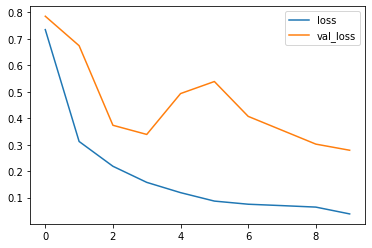

loss =  0.038563892245292664 , val_loss =  0.27908965945243835
32/32 [==============================] - 30s 941ms/step - loss: 0.0386 - acc: 0.9875 - val_loss: 0.2791 - val_acc: 0.9052 - lr: 0.0010


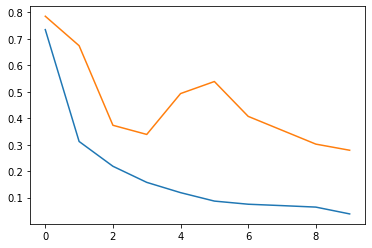

4/4 [==============================] - 1s 167ms/step - loss: 0.2791 - acc: 0.9052
loss= 0.27908968925476074
acc= 0.9052132964134216


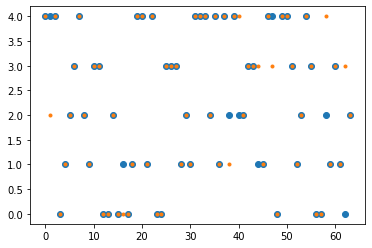

label category index = 4.0
predicted category index = 4
predicted category name = tulip


In [31]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "flower_prepared/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "flower_prepared/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=test_data_generator,
      epochs=10,
      callbacks = callbacks
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



test_x, test_y = test_data_generator.next()
y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(test_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", test_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


In [33]:
from tensorflow.keras.models import load_model

trained_model = load_model("best_model.h5")

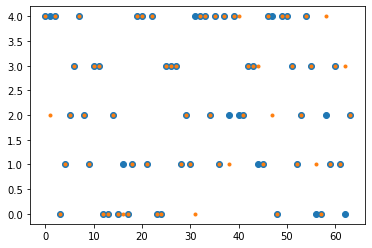

In [35]:
y_ = trained_model.predict(test_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(test_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()

In [36]:
print("label category index =", test_y[0])
print("predicted category index =", predicted[0])

label category index = 4.0
predicted category index = 4
